<a href="https://colab.research.google.com/github/uol-mediaprocessing/notebooks/blob/master/4-dot-operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dot Operations

In [0]:
from skimage import io
import cv2
from matplotlib import pyplot as plt
import numpy as np

Like before, we can load an example image from the internet with scikit-image.

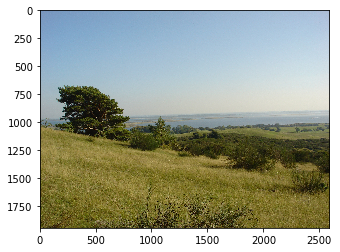

In [0]:
img = io.imread("https://raw.githubusercontent.com/svenschultze/mediaprocessing-notebooks/master/pictures/image87.jpeg")
plt.imshow(img)
plt.show()

**Dot operations** are operations on images, which only touch the values of
**single image elements** without altering the size, geometry or local image
structure. For example, we can **decrease the contrast** of an image by simply **dividing it with a number**.

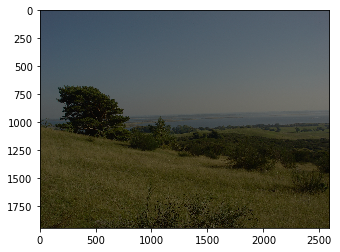

In [0]:
img_low_contrast = img // 2
plt.imshow(img_low_contrast)
plt.show()

We can also **brighten** it by **adding a value to each pixel**.

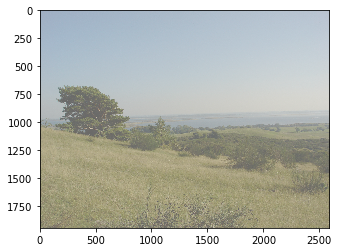

In [0]:
img_brightened = img_low_contrast + 100
plt.imshow(img_brightened)
plt.show()

To **inverse** an image, we can simply **subtract it from 255**.

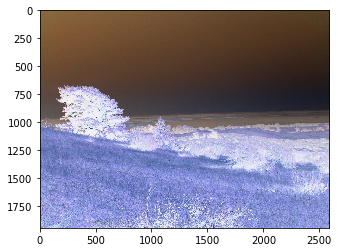

In [0]:
img_inverse = 255 - img
plt.imshow(img_inverse)
plt.show()

To apply **thresholding** to the image, we must first convert it to greyscale:

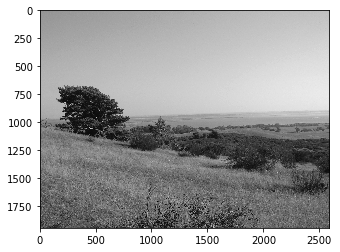

In [0]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

Now, we can iterate through the array and set each pixel of the output to 255 if it is above the threshold.

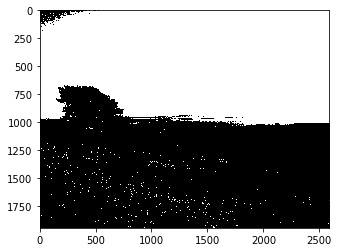

In [0]:
img_thresholded = np.zeros(img_gray.shape)
for row in range(len(img_gray)):
    for col in range(len(img_gray[row])):
        if img_gray[row][col] > 150:
            img_thresholded[row][col] = 255

plt.imshow(img_thresholded, cmap="gray")
plt.show()

However, numpy also allows an easier and more efficient approach:

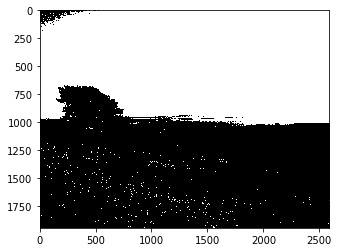

In [0]:
img_thresholded = img_gray > 150
plt.imshow(img_thresholded, cmap="gray")
plt.show()

Lets create an image with low contrast:

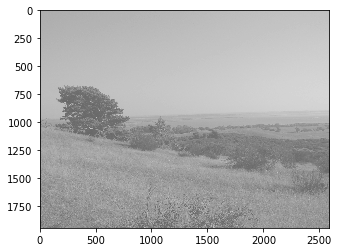

In [0]:
img_low = img_gray // 2 + 100
plt.imshow(img_low, cmap="gray", vmin=0, vmax=255)
plt.show()

To calculate the **maximum and minimum brightness** of an image, we can use the following functions:

In [0]:
max_brightness = np.max(img_low)
print(max_brightness)

min_brightness = np.min(img_low)
print(min_brightness)

225
100


To dynamically adjust the contrast of the image, we can subtract a number from the image so that the minimum brightness becomes 0, and multiply the result so that the maximum brightness becomes 255.

255
0


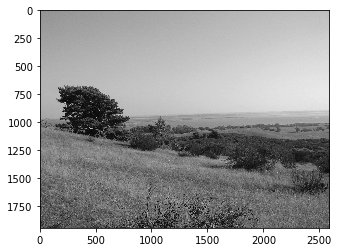

In [0]:
adjusted_min_brightness = img_low - min_brightness

max_brightness = np.max(adjusted_min_brightness)
adjusted_img = adjusted_min_brightness * (255 / max_brightness)
adjusted_img = adjusted_img.astype(np.uint8)

max_brightness_adjusted = np.max(adjusted_img)
print(max_brightness_adjusted)

min_brightness_adjusted = np.min(adjusted_img)
print(min_brightness_adjusted)

plt.imshow(adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.show()